In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'shotlog0-5.xlsx'  # Use the correct file path
data = pd.read_excel(file_path)

# Define which columns are numeric and categorical
numeric_features = ['SHOT_NUMBER', 'PERIOD', 'FINAL_MARGIN', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'FG%_2pts', 'FG%_3pts', 'score', 'PPG', 'EFG']
categorical_features = ['W', 'CLOSEST_DEFENDER']

# Exclude non-predictive and direct identifiers
predictive_features = data.drop(columns=['GAME_ID1', 'MATCHUP', 'player_name', 'player_id', 'FGM', 'PTS'])

# Handle missing values and preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])

# Target variable
target = data['FGM']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictive_features, target, test_size=0.2, random_state=42)

# Define the pipeline as before
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increased max_iter to 1000
])

# Define the parameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_probabilities = best_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_probabilities)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)

print(f"Test set accuracy: {test_accuracy:.2f}")
print(f"Test set ROC AUC score: {test_roc_auc:.2f}")
print(f"Test set precision: {test_precision:.2f}")
print(f"Test set recall: {test_recall:.2f}")
print(f"Test set F1 score: {test_f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Best parameters: {'classifier__C': 0.1, 'classifier__solver': 'newton-cg'}
Best ROC AUC score: 0.67
Test set accuracy: 0.63
Test set ROC AUC score: 0.66
Test set precision: 0.65
Test set recall: 0.84
Test set F1 score: 0.73
Confusion Matrix:
[[ 683 1533]
 [ 566 2894]]


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'updated_shot_logs.csv'  # Use the correct file path
data = pd.read_csv(file_path)

# Print column names to check for discrepancies
print("Column names in the dataframe:", data.columns)

# Define which columns are numeric and categorical
numeric_features = ['SHOT_NUMBER', 'PERIOD', 'FINAL_MARGIN', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'FG%_2pts', 'FG%_3pts', 'score', 'PPG', 'EFG']
categorical_features = ['W', 'CLOSEST_DEFENDER']

# Exclude non-predictive and direct identifiers
# Adjust the columns based on what actually exists in the data
columns_to_exclude = ['GAME_ID1', 'MATCHUP', 'player_name', 'player_id', 'FGM', 'PTS']
columns_to_exclude = [col for col in columns_to_exclude if col in data.columns]

predictive_features = data.drop(columns=columns_to_exclude)

# Handle missing values and preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])

# Target variable
target_column = 'FGM'  # Update this with the correct target column name if 'FGM' is not correct
target = data[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictive_features, target, test_size=0.2, random_state=42)

# Define the parameter grids for GridSearchCV
param_grid_logistic = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear']
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Create the pipelines for both models
pipeline_logistic = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Create the GridSearchCV objects
grid_search_logistic = GridSearchCV(pipeline_logistic, param_grid_logistic, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV objects to the data
grid_search_logistic.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and scores
print(f"Best parameters for Logistic Regression: {grid_search_logistic.best_params_}")
print(f"Best ROC AUC score for Logistic Regression: {grid_search_logistic.best_score_:.2f}")
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best ROC AUC score for Random Forest: {grid_search_rf.best_score_:.2f}")

# Evaluate the best Logistic Regression model on the test set
best_model_logistic = grid_search_logistic.best_estimator_
test_predictions_logistic = best_model_logistic.predict(X_test)
test_probabilities_logistic = best_model_logistic.predict_proba(X_test)[:, 1]

test_accuracy_logistic = accuracy_score(y_test, test_predictions_logistic)
test_roc_auc_logistic = roc_auc_score(y_test, test_probabilities_logistic)
test_precision_logistic = precision_score(y_test, test_predictions_logistic)
test_recall_logistic = recall_score(y_test, test_predictions_logistic)
test_f1_logistic = f1_score(y_test, test_predictions_logistic)
conf_matrix_logistic = confusion_matrix(y_test, test_predictions_logistic)

print(f"Logistic Regression Test set accuracy: {test_accuracy_logistic:.2f}")
print(f"Logistic Regression Test set ROC AUC score: {test_roc_auc_logistic:.2f}")
print(f"Logistic Regression Test set precision: {test_precision_logistic:.2f}")
print(f"Logistic Regression Test set recall: {test_recall_logistic:.2f}")
print(f"Logistic Regression Test set F1 score: {test_f1_logistic:.2f}")
print(f"Logistic Regression Confusion Matrix:\n{conf_matrix_logistic}")

# Evaluate the best Random Forest model on the test set
best_model_rf = grid_search_rf.best_estimator_
test_predictions_rf = best_model_rf.predict(X_test)
test_probabilities_rf = best_model_rf.predict_proba(X_test)[:, 1]

test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)
test_roc_auc_rf = roc_auc_score(y_test, test_probabilities_rf)
test_precision_rf = precision_score(y_test, test_predictions_rf)
test_recall_rf = recall_score(y_test, test_predictions_rf)
test_f1_rf = f1_score(y_test, test_predictions_rf)
conf_matrix_rf = confusion_matrix(y_test, test_predictions_rf)

print(f"Random Forest Test set accuracy: {test_accuracy_rf:.2f}")
print(f"Random Forest Test set ROC AUC score: {test_roc_auc_rf:.2f}")
print(f"Random Forest Test set precision: {test_precision_rf:.2f}")
print(f"Random Forest Test set recall: {test_recall_rf:.2f}")
print(f"Random Forest Test set F1 score: {test_f1_rf:.2f}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")

Column names in the dataframe: Index(['GAME_ID1', 'MATCHUP', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD',
       'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST',
       'Cat', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id', 'score', 'FG%_2pts', 'FG%_3pts', 'PPG',
       'EFG'],
      dtype='object')
Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}
Best ROC AUC score for Logistic Regression: 0.64
Best parameters for Random Forest: {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best ROC AUC score for Random Forest: 0.64
Logistic Regression Test set accuracy: 0.61
Logistic Regression Test set ROC AUC score: 0.64
Logistic Regression Test set precision: 0.59
Logistic Regression Test set recall: 0.47
Logisti

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'updated_shot_logs.csv'  # Use the correct file path
data = pd.read_csv(file_path)

# Feature Engineering

# Interaction Features
data['SHOT_CLOCK_x_SHOT_DIST'] = data['SHOT_CLOCK'] * data['SHOT_DIST']

# Binning Continuous Variables
data['SHOT_DIST_BINNED'] = pd.cut(data['SHOT_DIST'], bins=[0, 5, 10, 15, 20, 25, 30], labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])

# Aggregating Features
data['MEAN_TOUCH_TIME'] = data.groupby('player_id')['TOUCH_TIME'].transform('mean')

# Log Transformation
data['LOG_SHOT_DIST'] = np.log1p(data['SHOT_DIST'])

# Handle missing values before creating polynomial features
imputer = SimpleImputer(strategy='mean')
data[['SHOT_CLOCK', 'SHOT_DIST']] = imputer.fit_transform(data[['SHOT_CLOCK', 'SHOT_DIST']])

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[['SHOT_CLOCK', 'SHOT_DIST']])
poly_feature_names = poly.get_feature_names_out(['SHOT_CLOCK', 'SHOT_DIST'])
poly_df = pd.DataFrame(poly_features, columns=[f"poly_{name}" for name in poly_feature_names])
data = pd.concat([data.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)

# Define which columns are numeric and categorical
numeric_features = ['SHOT_NUMBER', 'PERIOD', 'FINAL_MARGIN', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'FG%_2pts', 'FG%_3pts', 'score', 'PPG', 'EFG', 'SHOT_CLOCK_x_SHOT_DIST', 'MEAN_TOUCH_TIME', 'LOG_SHOT_DIST'] + list(poly_df.columns)
categorical_features = ['W', 'CLOSEST_DEFENDER', 'SHOT_DIST_BINNED']

# Exclude non-predictive and direct identifiers
columns_to_exclude = ['GAME_ID1', 'MATCHUP', 'player_name', 'player_id', 'FGM', 'PTS']
columns_to_exclude = [col for col in columns_to_exclude if col in data.columns]

predictive_features = data.drop(columns=columns_to_exclude)

# Handle missing values and preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])

# Target variable
target_column = 'FGM'  # Ensure this is the correct target column name
target = data[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictive_features, target, test_size=0.2, random_state=42)

# Define the parameter grids for GridSearchCV
param_grid_logistic = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear']
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Create the pipelines for both models
pipeline_logistic = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Create the GridSearchCV objects
grid_search_logistic = GridSearchCV(pipeline_logistic, param_grid_logistic, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV objects to the data
grid_search_logistic.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and scores
print(f"Best parameters for Logistic Regression: {grid_search_logistic.best_params_}")
print(f"Best ROC AUC score for Logistic Regression: {grid_search_logistic.best_score_:.2f}")
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best ROC AUC score for Random Forest: {grid_search_rf.best_score_:.2f}")

# Evaluate the best Logistic Regression model on the test set
best_model_logistic = grid_search_logistic.best_estimator_
test_predictions_logistic = best_model_logistic.predict(X_test)
test_probabilities_logistic = best_model_logistic.predict_proba(X_test)[:, 1]

test_accuracy_logistic = accuracy_score(y_test, test_predictions_logistic)
test_roc_auc_logistic = roc_auc_score(y_test, test_probabilities_logistic)
test_precision_logistic = precision_score(y_test, test_predictions_logistic)
test_recall_logistic = recall_score(y_test, test_predictions_logistic)
test_f1_logistic = f1_score(y_test, test_predictions_logistic)
conf_matrix_logistic = confusion_matrix(y_test, test_predictions_logistic)

print(f"Logistic Regression Test set accuracy: {test_accuracy_logistic:.2f}")
print(f"Logistic Regression Test set ROC AUC score: {test_roc_auc_logistic:.2f}")
print(f"Logistic Regression Test set precision: {test_precision_logistic:.2f}")
print(f"Logistic Regression Test set recall: {test_recall_logistic:.2f}")
print(f"Logistic Regression Test set F1 score: {test_f1_logistic:.2f}")
print(f"Logistic Regression Confusion Matrix:\n{conf_matrix_logistic}")

# Evaluate the best Random Forest model on the test set
best_model_rf = grid_search_rf.best_estimator_
test_predictions_rf = best_model_rf.predict(X_test)
test_probabilities_rf = best_model_rf.predict_proba(X_test)[:, 1]

test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)
test_roc_auc_rf = roc_auc_score(y_test, test_probabilities_rf)
test_precision_rf = precision_score(y_test, test_predictions_rf)
test_recall_rf = recall_score(y_test, test_predictions_rf)
test_f1_rf = f1_score(y_test, test_predictions_rf)
conf_matrix_rf = confusion_matrix(y_test, test_predictions_rf)

print(f"Random Forest Test set accuracy: {test_accuracy_rf:.2f}")
print(f"Random Forest Test set ROC AUC score: {test_roc_auc_rf:.2f}")
print(f"Random Forest Test set precision: {test_precision_rf:.2f}")
print(f"Random Forest Test set recall: {test_recall_rf:.2f}")
print(f"Random Forest Test set F1 score: {test_f1_rf:.2f}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")

Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}
Best ROC AUC score for Logistic Regression: 0.64
Best parameters for Random Forest: {'classifier__bootstrap': True, 'classifier__max_depth': 30, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best ROC AUC score for Random Forest: 0.64
Logistic Regression Test set accuracy: 0.61
Logistic Regression Test set ROC AUC score: 0.64
Logistic Regression Test set precision: 0.60
Logistic Regression Test set recall: 0.43
Logistic Regression Test set F1 score: 0.50
Logistic Regression Confusion Matrix:
[[8880 2741]
 [5381 4056]]
Random Forest Test set accuracy: 0.62
Random Forest Test set ROC AUC score: 0.65
Random Forest Test set precision: 0.63
Random Forest Test set recall: 0.38
Random Forest Test set F1 score: 0.48
Random Forest Confusion Matrix:
[[9485 2136]
 [5825 3612]]


In [3]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 487.6 kB/s eta 0:04:17
   ---------------------------------------- 0.5/124.9 MB 4.2 MB/s eta 0:00:30
   ---------------------------------------- 1.1/124.9 MB 6.8 MB/s eta 0:00:19
    --------------------------------------- 1.9/124.9 MB 9.4 MB/s eta 0:00:14
    --------------------------------------- 3.0/124.9 MB 12.1 MB/s eta 0:00:11
   - -------------------------------------- 4.2/124.9 MB 14.2 MB/s eta 0:00:09
   - -------------------------------------- 5.5/124.9 MB 16.8 MB/s eta 0:00:08
   -- ------------------------------------- 7.2/124.9 MB 19.2 MB/s eta 0:00:07
   -- -----------------

|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 1         | 0.655     | 0.7498    | 0.1906    | 8.124     | 199.7     | 0.6624    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 2         | 0.6818    | 0.6624    | 0.02104   | 9.063     | 200.3     | 0.8832    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 3         | 0.6629    | 0.6082    | 0.1943    | 8.827     | 103.1     | 0.6727    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 4         | 0.683     | 0.6734    | 0.06781   | 6.673     | 158.0     | 0.7165    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 5         | 0.6835    | 0.8447    | 0.0365    | 5.045     | 141.6     | 0.7824    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 6         | 0.6823    | 0.8736    | 0.02055   | 5.063     | 141.5     | 0.821     |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 7         | 0.6789    | 0.6012    | 0.1758    | 5.091     | 142.4     | 0.8449    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 8         | 0.6773    | 0.6       | 0.2       | 4.253     | 141.7     | 0.6       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 9         | 0.6802    | 0.6018    | 0.01      | 9.781     | 200.7     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 10        | 0.6736    | 0.6       | 0.2       | 5.831     | 141.7     | 0.6       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 11        | 0.6773    | 0.7924    | 0.117     | 7.0       | 158.8     | 0.7095    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 12        | 0.6823    | 0.6303    | 0.03927   | 7.141     | 157.4     | 0.97      |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 13        | 0.6826    | 0.7523    | 0.01329   | 6.229     | 157.2     | 0.855     |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 14        | 0.6783    | 0.6       | 0.2       | 5.737     | 158.0     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 15        | 0.678     | 0.7914    | 0.01      | 8.919     | 201.3     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 16        | 0.6671    | 1.0       | 0.2       | 6.835     | 156.6     | 0.6       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 17        | 0.672     | 1.0       | 0.01      | 9.728     | 200.0     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 18        | 0.6738    | 0.9716    | 0.1403    | 6.297     | 291.1     | 0.975     |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 19        | 0.6824    | 0.6       | 0.01      | 7.29      | 158.0     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 20        | 0.6746    | 1.0       | 0.01      | 4.69      | 142.0     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 21        | 0.6842    | 0.956     | 0.02296   | 5.955     | 258.1     | 0.7402    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 22        | 0.6839    | 0.8169    | 0.04835   | 5.657     | 257.6     | 0.8922    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 23        | 0.6669    | 0.9999    | 0.1996    | 6.28      | 257.6     | 0.9995    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 24        | 0.6825    | 0.8219    | 0.01      | 5.525     | 258.0     | 0.6958    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 25        | 0.6827    | 0.6       | 0.01      | 5.813     | 258.2     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 26        | 0.6823    | 0.9187    | 0.01      | 5.9       | 258.6     | 0.6049    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 27        | 0.6827    | 0.6       | 0.01      | 5.156     | 257.5     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 28        | 0.6842    | 0.9596    | 0.02734   | 5.959     | 258.1     | 0.7446    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:05:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 29        | 0.6815    | 1.0       | 0.01      | 5.26      | 257.2     | 0.6       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:05:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:05:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:05:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 30        | 0.6835    | 0.603     | 0.0357    | 7.806     | 273.0     | 0.7005    |
Best parameters: {'colsample_bytree': 0.9595532144064108, 'learning_rate': 0.027344984592295313, 'max_depth': 5, 'n_estimators': 258, 'subsample': 0.7445850431214724}


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:05:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test set accuracy: 0.63
Test set ROC AUC score: 0.67
Test set precision: 0.66
Test set recall: 0.81
Test set F1 score: 0.73
Confusion Matrix:
[[ 761 1455]
 [ 645 2815]]


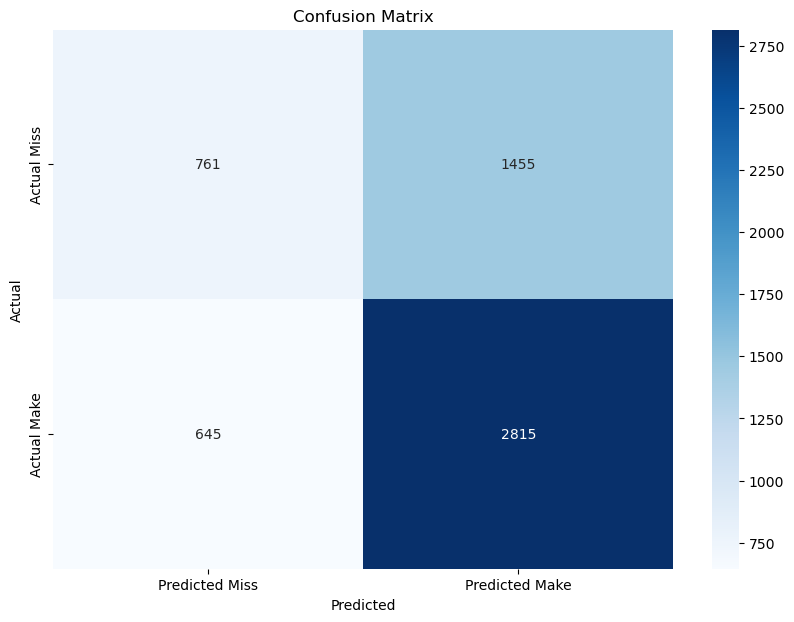

In [6]:
!pip install bayesian-optimization xgboost

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
import numpy as np

# Load the dataset
file_path = 'shotlog0-5.xlsx'  # Use the correct file path
data = pd.read_excel(file_path)

# Define which columns are numeric and categorical
numeric_features = ['SHOT_NUMBER', 'PERIOD', 'FINAL_MARGIN', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'FG%_2pts', 'FG%_3pts', 'score', 'PPG', 'EFG']
categorical_features = ['W', 'CLOSEST_DEFENDER']

# Exclude non-predictive and direct identifiers
predictive_features = data.drop(columns=['GAME_ID1', 'MATCHUP', 'player_name', 'player_id', 'FGM', 'PTS'])

# Handle missing values and preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])

# Target variable
target = data['FGM']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictive_features, target, test_size=0.2, random_state=42)

# Define a function to optimize
def xgb_evaluate(max_depth, learning_rate, n_estimators, subsample, colsample_bytree):
    params = {
        'max_depth': int(max_depth),
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators),
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'eval_metric': 'logloss',
        'use_label_encoder': False
    }
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(**params))
    ])
    
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
    return np.mean(cv_scores)

# Define the parameter bounds
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.2),
    'n_estimators': (50, 300),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=25)

# Print the best parameters
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])
print(f"Best parameters: {best_params}")

# Fit the model with the best parameters
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(**best_params, eval_metric='logloss', use_label_encoder=False))
])
best_pipeline.fit(X_train, y_train)

# Evaluate the best model on the test set
test_predictions = best_pipeline.predict(X_test)
test_probabilities = best_pipeline.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_probabilities)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)

print(f"Test set accuracy: {test_accuracy:.2f}")
print(f"Test set ROC AUC score: {test_roc_auc:.2f}")
print(f"Test set precision: {test_precision:.2f}")
print(f"Test set recall: {test_recall:.2f}")
print(f"Test set F1 score: {test_f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Miss', 'Predicted Make'], yticklabels=['Actual Miss', 'Actual Make'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
!pip install --upgrade scikit-learn imbalanced-learn --user

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)


In [14]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/ca/b4/57f3f253721e0a16ea28c49acca92c5b1198eb94fbbb8328d6dabc61d2e0/lightgbm-4.4.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 1.1 MB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.4 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 8.3 MB/s eta 0:00:00


|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 1         | 0.6605    | 0.7498    | 0.4754    | 0.1491    | 7.191     | 2.404     | 89.0      | 0.6232    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 2         | 0.6734    | 0.9465    | 0.3006    | 0.1445    | 3.144     | 9.729     | 258.1     | 0.6849    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 3         | 0.6776    | 0.6727    | 0.0917    | 0.06781   | 6.673     | 4.888     | 122.8     | 0.8447    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 4         | 0.6772    | 0.6558    | 0.1461    | 0.07961   | 6.192     | 8.067     | 99.92     | 0.8057    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 5         | 0.6749    | 0.837     | 0.02323   | 0.1254    | 4.194     | 1.585     | 287.2     | 0.9863    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 6         | 0.6643    | 0.8062    | 0.2257    | 0.2       | 6.807     | 5.022     | 122.9     | 0.9782    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 7         | 0.6701    | 0.6648    | 0.2192    | 0.09394   | 8.771     | 1.189     | 72.66     | 0.7353    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 8         | 0.6809    | 0.7861    | 0.4473    | 0.01895   | 3.119     | 5.464     | 284.7     | 0.8314    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 9         | 0.6832    | 0.6794    | 0.3814    | 0.03434   | 4.823     | 1.491     | 250.6     | 0.852     |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 10        | 0.6814    | 0.9705    | 0.4923    | 0.01916   | 6.602     | 3.725     | 286.6     | 0.6469    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 11        | 0.6813    | 0.8036    | 0.1257    | 0.01252   | 7.874     | 7.838     | 169.9     | 0.6386    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 12        | 0.678     | 0.9287    | 0.11      | 0.09522   | 4.568     | 8.374     | 138.4     | 0.8202    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 13        | 0.6678    | 0.7133    | 0.3       | 0.08507   | 8.512     | 8.579     | 164.7     | 0.8289    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 14        | 0.6548    | 0.7119    | 0.106     | 0.1651    | 5.631     | 1.897     | 284.1     | 0.6014    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 15        | 0.6498    | 0.9657    | 0.2847    | 0.1872    | 9.219     | 1.744     | 90.3      | 0.8109    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 16        | 0.6656    | 0.653     | 0.3839    | 0.1683    | 8.383     | 6.061     | 76.42     | 0.9292    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 17        | 0.6735    | 0.8704    | 0.49      | 0.1957    | 3.092     | 5.536     | 167.1     | 0.644     |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 18        | 0.6823    | 0.7816    | 0.4559    | 0.0316    | 4.925     | 1.499     | 235.0     | 0.806     |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 19        | 0.6808    | 0.6985    | 0.0384    | 0.04418   | 6.438     | 2.578     | 112.3     | 0.8973    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 20        | 0.6615    | 0.8979    | 0.2772    | 0.07367   | 9.03      | 7.926     | 258.6     | 0.8671    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 21        | 0.6786    | 0.9126    | 0.1548    | 0.1352    | 3.541     | 1.197     | 291.3     | 0.8049    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 22        | 0.6613    | 0.7417    | 0.3209    | 0.1193    | 5.918     | 9.37      | 293.8     | 0.6595    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 23        | 0.6735    | 0.6263    | 0.3761    | 0.1178    | 6.308     | 1.11      | 107.1     | 0.9206    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 24        | 0.6613    | 0.7073    | 0.04139   | 0.1119    | 8.764     | 4.128     | 116.5     | 0.6598    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 25        | 0.6771    | 0.7414    | 0.2178    | 0.178     | 3.4       | 1.356     | 135.5     | 0.7324    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 26        | 0.6793    | 0.8829    | 0.0985    | 0.06172   | 4.108     | 9.813     | 223.8     | 0.621     |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 27        | 0.6778    | 0.6299    | 0.4438    | 0.01714   | 3.103     | 1.602     | 145.5     | 0.6929    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 28        | 0.6638    | 0.7242    | 0.1345    | 0.08628   | 8.261     | 9.496     | 286.8     | 0.9379    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 29        | 0.6808    | 0.763     | 0.467     | 0.01324   | 7.257     | 5.729     | 261.1     | 0.9204    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 30        | 0.6675    | 0.7106    | 0.126     | 0.06177   | 8.061     | 5.292     | 285.5     | 0.7394    |
Best parameters: {'colsample_bytree': 0.6793992884103802, 'gamma': 0.3813904372081965, 'learning_rate': 0.034344247757730775, 'max_depth': 4, 'min_child_weight': 1.4908466147104145, 'n_estimators': 250, 'subsample': 0.852019039100048}


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test set accuracy: 0.63
Test set ROC AUC score: 0.67
Test set precision: 0.66
Test set recall: 0.81
Test set F1 score: 0.73
Confusion Matrix:
[[ 790 1426]
 [ 662 2798]]


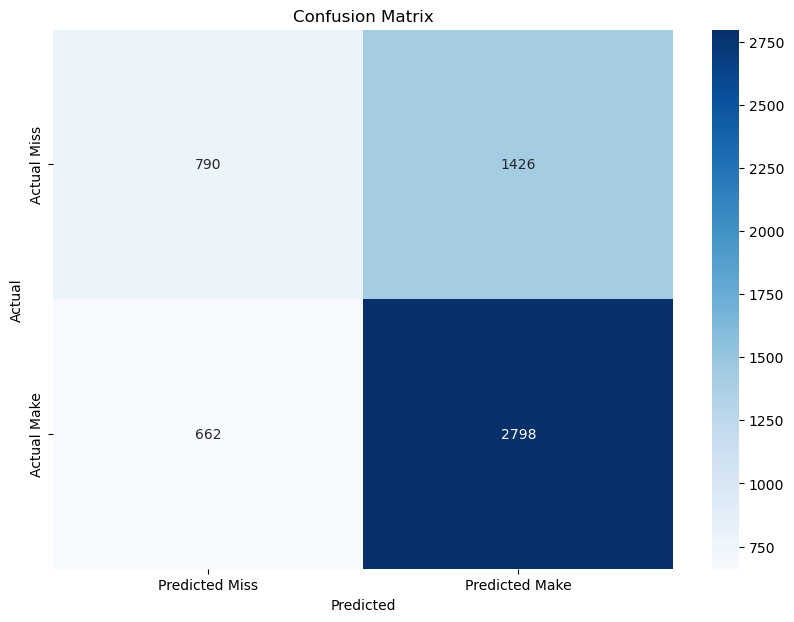

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
import numpy as np
from itertools import combinations
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'shotlog0-5.xlsx'  # Use the correct file path
data = pd.read_excel(file_path)

# Define which columns are numeric and categorical
numeric_features = ['SHOT_NUMBER', 'PERIOD', 'FINAL_MARGIN', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'FG%_2pts', 'FG%_3pts', 'score', 'PPG', 'EFG']
categorical_features = ['W', 'CLOSEST_DEFENDER']

# Exclude non-predictive and direct identifiers
predictive_features = data.drop(columns=['GAME_ID1', 'MATCHUP', 'player_name', 'player_id', 'FGM', 'PTS'])

# Create interaction features
def add_interaction_features(X, numeric_features):
    interaction_features = pd.DataFrame(index=X.index)
    feature_combinations = list(combinations(numeric_features, 2))
    for (feature1, feature2) in feature_combinations:
        interaction_features[f'{feature1}_{feature2}'] = X[feature1] * X[feature2]
    return interaction_features

interaction_features = add_interaction_features(predictive_features, numeric_features)
predictive_features = pd.concat([predictive_features, interaction_features], axis=1)

# Handle missing values and preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numeric_features + list(interaction_features.columns)),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])

# Target variable
target = data['FGM']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictive_features, target, test_size=0.2, random_state=42)

# Define a function to optimize
def xgb_evaluate(max_depth, learning_rate, n_estimators, subsample, colsample_bytree, min_child_weight, gamma):
    params = {
        'max_depth': int(max_depth),
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators),
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'min_child_weight': min_child_weight,
        'gamma': gamma,
        'eval_metric': 'logloss',
        'use_label_encoder': False
    }
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(**params))
    ])
    
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
    return np.mean(cv_scores)

# Define the parameter bounds
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.2),
    'n_estimators': (50, 300),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0),
    'min_child_weight': (1, 10),
    'gamma': (0, 0.5)
}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=25)

# Print the best parameters
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])
print(f"Best parameters: {best_params}")

# Fit the model with the best parameters
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(**best_params, eval_metric='logloss', use_label_encoder=False))
])
best_pipeline.fit(X_train, y_train)

# Evaluate the best model on the test set
test_predictions = best_pipeline.predict(X_test)
test_probabilities = best_pipeline.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_probabilities)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)

print(f"Test set accuracy: {test_accuracy:.2f}")
print(f"Test set ROC AUC score: {test_roc_auc:.2f}")
print(f"Test set precision: {test_precision:.2f}")
print(f"Test set recall: {test_recall:.2f}")
print(f"Test set F1 score: {test_f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Miss', 'Predicted Make'], yticklabels=['Actual Miss', 'Actual Make'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [17]:
# Evaluate the model on the training set
train_predictions = best_pipeline.predict(X_train)
train_probabilities = best_pipeline.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, train_predictions)
train_roc_auc = roc_auc_score(y_train, train_probabilities)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)
train_conf_matrix = confusion_matrix(y_train, train_predictions)

print(f"Training set accuracy: {train_accuracy:.2f}")
print(f"Training set ROC AUC score: {train_roc_auc:.2f}")
print(f"Training set precision: {train_precision:.2f}")
print(f"Training set recall: {train_recall:.2f}")
print(f"Training set F1 score: {train_f1:.2f}")
print(f"Confusion Matrix:\n{train_conf_matrix}")

Training set accuracy: 0.69
Training set ROC AUC score: 0.74
Training set precision: 0.70
Training set recall: 0.85
Training set F1 score: 0.77
Confusion Matrix:
[[ 3699  5004]
 [ 2140 11859]]


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:31:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:31:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:31:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

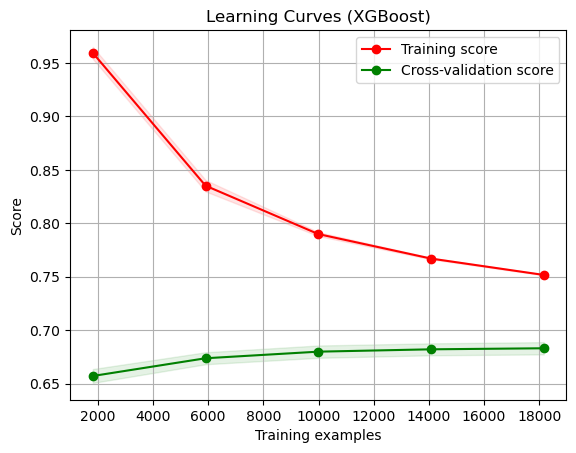

In [18]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5), scoring='roc_auc'):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot learning curves
plot_learning_curve(best_pipeline, "Learning Curves (XGBoost)", X_train, y_train, cv=5)
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
file_path = 'shotlog0-5.xlsx'  # Use the correct file path
data = pd.read_excel(file_path)

# Define which columns are numeric and categorical
numeric_features = ['SHOT_NUMBER', 'PERIOD', 'FINAL_MARGIN', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'FG%_2pts', 'FG%_3pts', 'score', 'PPG', 'EFG']
categorical_features = ['W', 'CLOSEST_DEFENDER']

# Exclude non-predictive and direct identifiers
predictive_features = data.drop(columns=['GAME_ID1', 'MATCHUP', 'player_name', 'player_id', 'FGM', 'PTS'])

# Handle missing values and preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])

# Target variable
target = data['FGM']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictive_features, target, test_size=0.2, random_state=42)

# Transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Define XGBoost parameters including regularization and subsampling
params = {
    'max_depth': 3,
    'learning_rate': 0.034,
    'n_estimators': 250,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.38,
    'min_child_weight': 2,
    'reg_alpha': 0.5,  # Increased L1 regularization term on weights
    'reg_lambda': 0.5,  # Increased L2 regularization term on weights
    'eval_metric': 'logloss',
    'use_label_encoder': False
}

# Create the model
model = XGBClassifier(**params)

# Fit the model with early stopping
model.fit(X_train_transformed, y_train, 
          early_stopping_rounds=10, 
          eval_set=[(X_test_transformed, y_test)], 
          verbose=False)

# Evaluate the model on the test set
test_predictions = model.predict(X_test_transformed)
test_probabilities = model.predict_proba(X_test_transformed)[:, 1]

test_accuracy = accuracy_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_probabilities)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)

print(f"Test set accuracy: {test_accuracy:.2f}")
print(f"Test set ROC AUC score: {test_roc_auc:.2f}")
print(f"Test set precision: {test_precision:.2f}")
print(f"Test set recall: {test_recall:.2f}")
print(f"Test set F1 score: {test_f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Miss', 'Predicted Make'], yticklabels=['Actual Miss', 'Actual Make'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 1         | 0.6257    | 0.7498    | 0.1906    | 8.124     | 199.7     | 0.6624    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 2         | 0.6477    | 0.6624    | 0.02104   | 9.063     | 200.3     | 0.8832    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 3         | 0.6339    | 0.6082    | 0.1943    | 8.827     | 103.1     | 0.6727    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 4         | 0.6475    | 0.6734    | 0.06781   | 6.673     | 158.0     | 0.7165    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 5         | 0.65      | 0.8447    | 0.0365    | 5.045     | 141.6     | 0.7824    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 6         | 0.6494    | 0.8721    | 0.02021   | 5.062     | 141.5     | 0.819     |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 7         | 0.6493    | 0.7649    | 0.07639   | 5.389     | 142.4     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 8         | 0.6465    | 0.7578    | 0.1964    | 4.189     | 142.3     | 0.8639    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 9         | 0.6462    | 0.6       | 0.01      | 9.984     | 200.9     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 10        | 0.6353    | 0.6       | 0.2       | 6.173     | 141.7     | 0.6       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 11        | 0.6499    | 0.6       | 0.09287   | 4.251     | 141.3     | 0.6       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 12        | 0.6474    | 1.0       | 0.01      | 5.056     | 143.4     | 0.6       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 13        | 0.6479    | 1.0       | 0.2       | 3.791     | 140.4     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 14        | 0.6414    | 0.6       | 0.01      | 3.008     | 141.2     | 0.6       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 15        | 0.6448    | 0.6       | 0.2       | 4.707     | 140.3     | 0.6       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 16        | 0.6472    | 0.6       | 0.01      | 8.914     | 201.4     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 17        | 0.641     | 0.8765    | 0.1639    | 5.733     | 158.8     | 0.6294    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 18        | 0.6467    | 0.7263    | 0.06392   | 7.599     | 157.3     | 0.881     |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 19        | 0.648     | 0.6       | 0.01      | 7.731     | 158.6     | 0.6       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 20        | 0.6285    | 0.7071    | 0.2       | 8.794     | 158.1     | 0.77      |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 21        | 0.6435    | 1.0       | 0.01      | 4.379     | 141.6     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 22        | 0.6473    | 0.6       | 0.01      | 7.09      | 158.8     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 23        | 0.6443    | 0.6       | 0.01      | 4.883     | 142.4     | 0.6       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 24        | 0.6426    | 1.0       | 0.2       | 5.755     | 143.1     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 25        | 0.6447    | 0.6       | 0.2       | 4.843     | 141.2     | 0.6       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 26        | 0.6364    | 0.6       | 0.2       | 7.321     | 158.1     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 27        | 0.6477    | 0.9603    | 0.104     | 5.164     | 142.0     | 1.0       |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 28        | 0.6502    | 0.8486    | 0.04044   | 5.049     | 141.6     | 0.7867    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 29        | 0.6437    | 0.6827    | 0.2       | 4.027     | 140.8     | 0.6956    |


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\paulk\anaconda3\Lib\site-packages\

| 30        | 0.6389    | 1.0       | 0.2       | 5.309     | 141.7     | 0.6       |
Best parameters: {'colsample_bytree': 0.8486275103200995, 'learning_rate': 0.04043853400923609, 'max_depth': 5, 'n_estimators': 141, 'subsample': 0.7866708284057666}


C:\Users\paulk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test set accuracy: 0.63
Test set ROC AUC score: 0.65
Test set precision: 0.65
Test set recall: 0.36
Test set F1 score: 0.47
Confusion Matrix:
[[9800 1821]
 [5998 3439]]


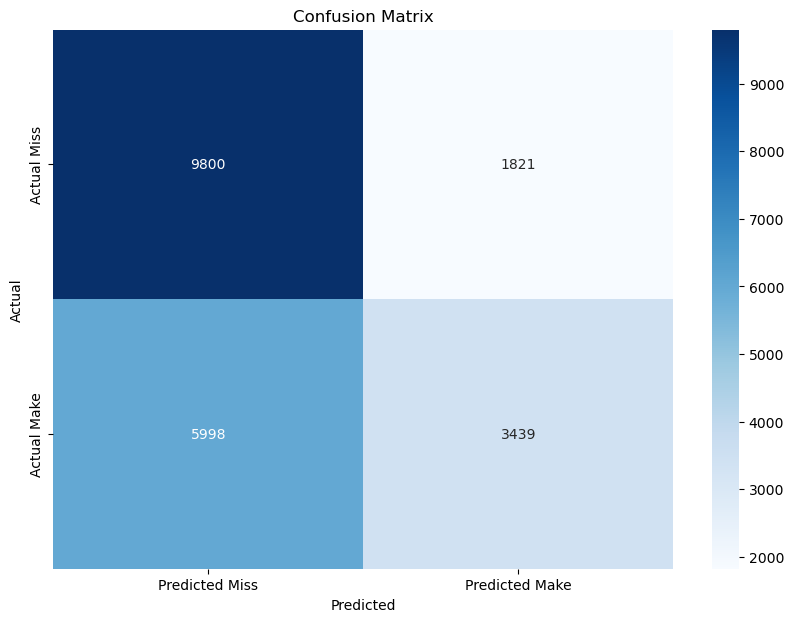

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
file_path = 'updated_shot_logs.csv'  # Use the correct file path
data = pd.read_csv(file_path)

# Define which columns are numeric and categorical
numeric_features = ['SHOT_NUMBER', 'PERIOD', 'FINAL_MARGIN', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'FG%_2pts', 'FG%_3pts', 'score', 'PPG', 'EFG']
categorical_features = ['W', 'CLOSEST_DEFENDER']

# Exclude non-predictive and direct identifiers
predictive_features = data.drop(columns=['GAME_ID1', 'MATCHUP', 'player_name', 'player_id', 'FGM', 'PTS'])

# Handle missing values and preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])

# Target variable
target = data['FGM']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictive_features, target, test_size=0.2, random_state=42)

# Define a function to optimize
def xgb_evaluate(max_depth, learning_rate, n_estimators, subsample, colsample_bytree):
    params = {
        'max_depth': int(max_depth),
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators),
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'eval_metric': 'logloss',
        'use_label_encoder': False
    }
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(**params))
    ])
    
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
    return np.mean(cv_scores)

# Define the parameter bounds
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.2),
    'n_estimators': (50, 300),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=25)

# Print the best parameters
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])
print(f"Best parameters: {best_params}")

# Fit the model with the best parameters
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(**best_params, eval_metric='logloss', use_label_encoder=False))
])
best_pipeline.fit(X_train, y_train)

# Evaluate the best model on the test set
test_predictions = best_pipeline.predict(X_test)
test_probabilities = best_pipeline.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_probabilities)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)

print(f"Test set accuracy: {test_accuracy:.2f}")
print(f"Test set ROC AUC score: {test_roc_auc:.2f}")
print(f"Test set precision: {test_precision:.2f}")
print(f"Test set recall: {test_recall:.2f}")
print(f"Test set F1 score: {test_f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Miss', 'Predicted Make'], yticklabels=['Actual Miss', 'Actual Make'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
